# PowerCo Feature Engineering

**Importing the libraries and packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

**Loading the data into dataframe**

In [3]:
df = pd.read_csv('clean_data_after_eda.csv')

In [4]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


**Formatting the data**

In [5]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
# Setting Dates from String object to Datetime value
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [7]:
df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [8]:
# Changing values from String object to Integer
df['has_gas'].replace(['t', 'f'], [1, 0], inplace = True)

### Channel Sales Quantitative Variable Conversion

In [9]:
old_channels = df['channel_sales'].unique()

In [10]:
for i in range(len(old_channels)):
    df['channel_sales'].replace(old_channels[i], str(i), inplace = True)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,1,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,0,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,2,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,1,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [11]:
df['channel_sales'].value_counts()

0    6754
1    3725
2    1843
3    1375
4     893
6      11
5       3
7       2
Name: channel_sales, dtype: int64

In [12]:
channel_churn = df.groupby('channel_sales', as_index = False)['churn'].value_counts()
channel_churn

,channel_sales,churn,count
0,0,0,5934
1,0,1,820
2,1,0,3442
3,1,1,283
4,2,0,1740
5,2,1,103
6,3,0,1237
7,3,1,138
8,4,0,818
9,4,1,75


 - **Channels 5, 6, 7 produce no churned customers. Therefore, it safe to remove them for the dummies.**

In [13]:
df = pd.get_dummies(df, columns = ['channel_sales'], prefix = 'channel')
df.drop(columns = ['channel_5', 'channel_6', 'channel_7'], inplace = True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0


### Origin Up Quanitative Variable Conversion

In [14]:
old_origins = df['origin_up'].unique()

In [15]:
for i in range(len(old_origins)):
    df['origin_up'].replace(old_origins[i], str(i), inplace = True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,0,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,1,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,1,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,1,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,1,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0


In [16]:
df['origin_up'].value_counts()

0    7097
1    4294
2    3148
3      64
4       2
5       1
Name: origin_up, dtype: int64

In [17]:
origin_churn = df.groupby('origin_up', as_index = False)['churn'].value_counts()
origin_churn

,origin_up,churn,count
0,0,0,6204
1,0,1,893
2,1,0,4036
3,1,1,258
4,2,0,2884
5,2,1,264
6,3,0,60
7,3,1,4
8,4,0,2
9,5,0,1


 - **Origins 4, 5 produce no churned customers. Therefore, it safe to remove them for the dummies.**

In [18]:
df = pd.get_dummies(df, columns = ['origin_up'], prefix = 'origin')
df.drop(columns = ['origin_4', 'origin_5'], inplace = True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0


### Jan and Dec Price Differences

**Off-Peak Period Prices**

In [19]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [20]:
df = pd.merge(df, diff, on = 'id')
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916


**Peak Period Prices**

In [21]:
# Group peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_peak_var': 'mean', 'price_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_peak_var': 'dec_1a', 'price_peak_fix': 'dec_2a'}), jan_prices.drop(columns='price_date'), on='id')
diff['peak_diff_dec_january_energy'] = diff['dec_1a'] - diff['price_peak_var']
diff['peak_diff_dec_january_power'] = diff['dec_2a'] - diff['price_peak_fix']
diff = diff[['id', 'peak_diff_dec_january_energy','peak_diff_dec_january_power']]
diff.head()

,id,peak_diff_dec_january_energy,peak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


In [22]:
df = pd.merge(df, diff, on = 'id')
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749


**Mid-Peak Period Prices**

In [23]:
# Group peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_mid_peak_var': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_mid_peak_var': 'dec_1b', 'price_mid_peak_fix': 'dec_2b'}), jan_prices.drop(columns='price_date'), on='id')
diff['mid_peak_diff_dec_january_energy'] = diff['dec_1b'] - diff['price_mid_peak_var']
diff['mid_peak_diff_dec_january_power'] = diff['dec_2b'] - diff['price_mid_peak_fix']
diff = diff[['id', 'mid_peak_diff_dec_january_energy','mid_peak_diff_dec_january_power']]
diff.head()

,id,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


In [24]:
df = pd.merge(df, diff, on = 'id')
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166


### Date Manipulation

**Months from last product modification to end date of contract**
 - To check if the amount of time for last service of product is an indicator of churn

In [25]:
df['modif_end_months'] = ((df['date_end'] - df['date_modif_prod'])/np.timedelta64(1, 'M')).astype('int')

In [26]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power,modif_end_months
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,7
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,84
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,72
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,72
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,73


**Months from activation to end of contract**
 - To check the tenure of the contract of a customer

In [27]:
df['activ_end_months'] = ((df['date_end'] - df['date_activ'])/np.timedelta64(1, 'M')).astype('int')
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power,modif_end_months,activ_end_months
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,7,36
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,84,84
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,72,72
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,72,72
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,73,73


**Months from renewal to end of contract**
- To check if the quickness of renewal prior to end of contract is an indicator of churn

In [28]:
df['renewal_end_months'] = ((df['date_end'] - df['date_renewal'])/np.timedelta64(1, 'M')).astype('int')
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power,modif_end_months,activ_end_months,renewal_end_months
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,7,36,11
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,84,84,11
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,72,72,11
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,72,72,11
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,73,73,11


**Months from activation to last modification of product**

In [29]:
df['activ_modif_months'] = ((df['date_modif_prod'] - df['date_activ'])/np.timedelta64(1, 'M')).astype('int')
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power,modif_end_months,activ_end_months,renewal_end_months,activ_modif_months
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,7,36,11,28
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,84,84,11,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,72,72,11,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,72,72,11,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,73,73,11,0


**Months from last modification to renewal of contract**
 - To check if the renewal of contract after a close last modification is an indicator of churn

In [30]:
df['renewal_modif_months'] = ((df['date_renewal'] - df['date_modif_prod'])/np.timedelta64(1, 'M')).astype('int')
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power,modif_end_months,activ_end_months,renewal_end_months,activ_modif_months,renewal_modif_months
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,7,36,11,28,-4
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,84,84,11,0,72
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,72,72,11,0,60
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,72,72,11,0,60
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,73,73,11,0,61


**Dropping All Date Columns**

In [31]:
df.drop(columns = ['date_activ', 'date_renewal', 'date_modif_prod', 'date_end'], inplace = True)

### Average Prices

**Per Period : Off-Peak, Peak, Mid-Peak**

In [32]:
avg_prices = price_df.groupby('id', as_index = False).agg({
    'price_off_peak_var' : 'mean',
    'price_peak_var' : 'mean',
    'price_mid_peak_var' : 'mean',
    'price_off_peak_fix' : 'mean',
    'price_peak_fix' : 'mean',
    'price_mid_peak_fix' : 'mean',
})

In [33]:
avg_prices.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [34]:
# Renaming Columns For Average Prices
columns = {
    'price_off_peak_var' : 'avg_price_off_peak_var',
    'price_peak_var' : 'avg_price_peak_var',
    'price_mid_peak_var' : 'avg_price_mid_peak_var',
    'price_off_peak_fix' : 'avg_price_off_peak_fix',
    'price_peak_fix' : 'avg_price_peak_fix',
    'price_mid_peak_fix' : 'avg_price_mid_peak_fix',
}

avg_prices.rename(columns = columns, inplace = True)

In [35]:
df = pd.merge(df, avg_prices, on = 'id')

In [36]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power,modif_end_months,activ_end_months,renewal_end_months,activ_modif_months,renewal_modif_months,avg_price_off_peak_var,avg_price_peak_var,avg_price_mid_peak_var,avg_price_off_peak_fix,avg_price_peak_fix,avg_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,7,36,11,28,-4,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,84,84,11,0,72,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,72,72,11,0,60,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,72,72,11,0,60,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,73,73,11,0,61,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263


### Correcting Skewness

In [113]:
features = ['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'num_years_antig', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak',
       'var_6m_price_peak', 'var_6m_price_mid_peak']

In [114]:
old_skew = df[features].skew().sort_values(ascending=False)
old_skew

net_margin                        36.569515
var_6m_price_off_peak_fix         22.886924
var_6m_price_off_peak             22.886911
var_year_price_off_peak_fix       22.051551
var_year_price_off_peak           22.051457
var_6m_price_off_peak_var         16.954975
forecast_cons_year                16.587990
imp_cons                          13.198799
var_year_price_off_peak_var       12.052339
var_6m_price_peak                 10.721069
var_6m_price_peak_fix             10.721053
var_6m_price_mid_peak_var         10.072325
var_6m_price_mid_peak_fix          9.862636
var_6m_price_mid_peak              9.862635
cons_gas_12m                       9.597530
var_year_price_peak_var            8.979052
var_6m_price_peak_var              8.948396
var_year_price_mid_peak_var        8.720249
var_year_price_peak                7.908207
var_year_price_peak_fix            7.908174
var_year_price_mid_peak            7.907295
var_year_price_mid_peak_fix        7.907288
forecast_cons_12m               

 - Positive value means the distribution is skewed to the right.
 - Negative value means the distribution is skewed to the left.
 - 0 means perfect normal distribution. The bell shaped curve.

In [77]:
import scipy.stats as stats
import statsmodels.api as sm

In [115]:
from sklearn.preprocessing import QuantileTransformer
def test_transformers(columns):
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    df_quantile = pd.DataFrame(qt.fit_transform(df[columns]))
    return df_quantile

In [116]:
df_skew = test_transformers(features)

In [118]:
cols = {}
for (i, col) in enumerate(features):
    cols[i] = col
cols
df_skew.rename(columns = cols, inplace = True)

In [119]:
new_skew = df_skew.skew().sort_values(ascending = False)
new_skew

forecast_discount_energy          5.327734
var_6m_price_mid_peak_fix         2.176215
var_6m_price_peak_fix             2.169008
var_6m_price_mid_peak_var         2.029933
var_6m_price_mid_peak             1.821780
cons_gas_12m                      1.699708
var_year_price_mid_peak_fix       0.966902
var_year_price_peak_fix           0.965681
var_year_price_mid_peak_var       0.746966
var_year_price_mid_peak           0.626331
var_6m_price_off_peak_fix         0.478782
num_years_antig                   0.313636
var_6m_price_peak_var             0.166674
var_6m_price_peak                 0.166556
pow_max                           0.043722
forecast_price_energy_peak       -0.004436
forecast_price_energy_off_peak   -0.020921
var_year_price_peak_var          -0.161413
var_year_price_peak              -0.162075
imp_cons                         -0.227132
forecast_cons_year               -0.232665
forecast_price_pow_off_peak      -0.238814
cons_last_month                  -0.531667
cons_12m   

In [125]:
feats2 = ['index', 'id', 'churn', 'channel_0',
       'channel_1', 'channel_2', 'channel_3', 'channel_4', 'origin_0',
       'origin_1', 'origin_2', 'origin_3', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_january_power', 'peak_diff_dec_january_energy',
       'peak_diff_dec_january_power', 'mid_peak_diff_dec_january_energy',
       'mid_peak_diff_dec_january_power', 'modif_end_months',
       'activ_end_months', 'renewal_end_months', 'activ_modif_months',
       'renewal_modif_months', 'avg_price_off_peak_var', 'avg_price_peak_var',
       'avg_price_mid_peak_var', 'avg_price_off_peak_fix',
       'avg_price_peak_fix', 'avg_price_mid_peak_fix']

In [126]:
(df.reset_index())[feats2]

,index,id,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power,modif_end_months,activ_end_months,renewal_end_months,activ_modif_months,renewal_modif_months,avg_price_off_peak_var,avg_price_peak_var,avg_price_mid_peak_var,avg_price_off_peak_fix,avg_price_peak_fix,avg_price_mid_peak_fix
0,0,24011ae4ebbe3035111d65fa7c15bc57,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,7,36,11,28,-4,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,1,d29c2c54acc38ff3c0614d0a653813dd,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,84,84,11,0,72,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,2,764c75f661154dac3a6c254cd082ea7d,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,72,72,11,0,60,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,3,bba03439a292a1e166f80264c16191cb,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,72,72,11,0,60,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,4,149d57cf92fc41cf94415803a877cb4b,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,73,73,11,0,61,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,14601,18463073fb097fc0ac5d3e040f356987,0,1,0,0,0,0,1,0,0,0,-0.008653,0.177779,0.000000,0.000000,0.000000,0.000000,12,47,23,35,-11,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000
14602,14602,d0a6f71671571ed83b2645d23af6de00,1,1,0,0,0,0,1,0,0,0,-0.007395,0.236694,-0.003727,0.145963,0.000260,0.033471,48,48,11,0,36,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418
14603,14603,10e6828ddd62cbcf687cb74928c4c2d2,1,1,0,0,0,0,1,0,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,47,47,11,0,36,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
14604,14604,1cf20fd6206d7678d5bcafd28c53b4db,0,1,0,0,0,0,1,0,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,48,48,11,0,36,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000


In [108]:
df_skew.reset_index()

,index,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak
0,0,-5.199338,1.582273,-5.199338,-5.199338,-5.199338,-5.199338,-1.584644,-1.431438,0.482771,-0.976822,-5.199338,0.289188,0.289188,1.853871,-1.371110,1.773461,1.655353,1.405859,1.985947,1.910160,2.052919,2.052914,1.910160,2.052910,2.052956,2.105661,1.822731,2.418267,2.315481,2.456544,2.456544,2.272076,2.421952,2.468321
1,1,-0.810169,-5.199338,-5.199338,-1.391373,-5.199338,-5.199338,-0.602120,0.477134,-5.199338,0.282507,-5.199338,-0.494090,-0.494090,-1.417350,0.714448,-0.156357,-0.553584,1.879911,-5.199338,0.075421,-5.199338,-5.199338,-0.007359,0.494090,-5.199338,-0.261655,2.256360,-5.199338,1.097220,-5.199338,-5.199338,1.159638,1.061248,-5.199338
2,2,-1.981714,-5.199338,-5.199338,-1.763106,-5.199338,-5.199338,0.270721,1.615454,0.212569,0.282507,-5.199338,0.578204,0.578204,-1.794803,0.714448,0.020095,-0.264650,-0.080847,-5.199338,0.329890,-5.199338,-5.199338,0.460314,-0.081517,-5.199338,-0.194619,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.707980,-5.199338,-5.199338
3,3,-1.614949,-5.199338,-5.199338,-1.262805,-5.199338,-5.199338,0.136555,0.787718,-5.199338,0.282507,-5.199338,0.704756,0.704756,-1.230998,0.714448,-0.378027,-0.388840,-5.199338,-5.199338,-0.067867,-5.199338,-5.199338,0.015070,-5.199338,-5.199338,-0.657247,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.397296,-5.199338,-5.199338
4,4,-0.846531,-5.199338,-0.124508,-0.762990,0.143022,-5.199338,0.804962,-0.569321,0.925493,-0.976822,0.084015,1.447362,1.447362,-0.720044,0.714448,0.743938,0.235749,0.367258,1.445574,-0.272066,0.774090,0.784297,-0.335199,0.740630,0.861836,0.575238,0.917812,-5.199338,-5.199338,-5.199338,-5.199338,-0.158900,0.669768,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,14601,0.533520,1.542975,-5.199338,1.323206,-5.199338,-5.199338,-0.025119,-0.314018,-5.199338,0.282507,-5.199338,0.526682,0.526682,1.074308,-0.508329,0.253866,0.267401,-5.199338,-5.199338,0.620285,-5.199338,-5.199338,0.813530,-5.199338,-5.199338,-0.804962,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.796532,-5.199338,-5.199338
14602,14602,-0.476574,-5.199338,-0.324591,-0.467052,-0.095588,-5.199338,1.421021,-2.196501,0.307783,2.225434,-0.116884,-5.199338,-5.199338,-0.182635,-1.371110,-3.153153,0.170701,0.343432,-5.199338,1.068269,1.539934,0.572590,1.068115,1.539773,0.572582,0.226192,0.286715,-5.199338,1.220970,1.734049,1.110355,1.220960,1.734035,1.110226
14603,14603,-1.514493,-5.199338,-0.325773,-1.390405,-0.097270,-5.199338,0.534224,-0.569321,0.925493,-0.976822,-0.105984,1.291897,1.291897,-1.383535,-0.508329,0.405145,0.329890,0.496930,1.043767,-0.479951,0.626385,0.638657,-0.528439,0.611177,0.698331,0.575238,0.917812,-5.199338,-5.199338,-5.199338,-5.199338,-0.158900,0.669768,-5.199338
14604,14604,-2.173934,-5.199338,-5.199338,-1.865582,-5.199338,-5.199338,-1.445527,0.477134,-5.199338,0.282507,-5.199338,-0.765885,-0.765885,-2.051738,-1.371110,-0.843771,-0.553584,1.879911,-5.199338,0.047740,-5.199338,-5.199338,-0.007639,0.494090,-5.199338,-0.261655,2.256360,-5.199338,1.097220,-5.199338,-5.199338,1.159638,1.061248,-5.199338


In [131]:
df_nonskew = pd.merge(df.reset_index()[feats2], df_skew.reset_index(), on = 'index')
df_nonskew.head()

,index,id,churn,channel_0,channel_1,channel_2,channel_3,channel_4,origin_0,origin_1,origin_2,origin_3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power,modif_end_months,activ_end_months,renewal_end_months,activ_modif_months,renewal_modif_months,avg_price_off_peak_var,avg_price_peak_var,avg_price_mid_peak_var,avg_price_off_peak_fix,avg_price_peak_fix,avg_price_mid_peak_fix,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak
0,0,24011ae4ebbe3035111d65fa7c15bc57,1,1,0,0,0,0,1,0,0,0,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389,7,36,11,28,-4,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,-5.199338,1.581645,-5.199338,-5.199338,-5.199338,-5.199338,-1.571072,-1.417583,0.463109,-0.960759,-5.199338,0.282507,0.282507,1.850649,-1.377568,1.773461,1.642227,1.420211,1.970379,1.910160,2.052919,2.096072,1.910141,2.052920,2.095855,2.120779,1.847353,2.390506,2.315481,2.511438,2.456544,2.280949,2.446602,2.504643
1,1,d29c2c54acc38ff3c0614d0a653813dd,0,0,1,0,0,0,0,1,0,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000,84,84,11,0,72,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,-0.813661,-5.199338,-5.199338,-1.390899,-5.199338,-5.199338,-0.617243,0.477134,-5.199338,0.298225,-5.199338,-0.511189,-0.511189,-1.434032,0.701540,-0.166536,-0.549067,1.910163,-5.199338,0.075421,-5.199338,-5.199338,-0.007535,0.479951,-5.199338,-0.272043,2.225434,-5.199338,1.101817,-5.199338,-5.199338,1.164422,1.056848,-5.199338
2,2,764c75f661154dac3a6c254cd082ea7d,0,1,0,0,0,0,0,1,0,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000,72,72,11,0,60,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,-1.976009,-5.199338,-5.199338,-1.761550,-5.199338,-5.199338,0.253859,1.597203,0.186945,0.298225,-5.199338,0.566370,0.566370,-1.817447,0.701540,0.000000,-0.266857,-0.091490,-5.199338,0.335199,-5.199338,-5.199338,0.465906,-0.092676,-5.199338,-0.204868,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.704756,-5.199338,-5.199338
3,3,bba03439a292a1e166f80264c16191cb,0,0,0,1,0,0,0,1,0,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000,72,72,11,0,60,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,-1.622159,-5.199338,-5.199338,-1.253371,-5.199338,-5.199338,0.117311,0.787718,-5.199338,0.298225,-5.199338,0.698331,0.698331,-1.231070,0.701540,-0.378027,-0.388840,-5.199338,-5.199338,-0.067867,-5.199338,-5.199338,0.017582,-5.199338,-5.199338,-0.666628,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.384084,-5.199338,-5.199338
4,4,149d57cf92fc41cf94415803a877cb4b,0,0,1,0,0,0,0,1,0,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166,73,73,11,0,61,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,-0.852554,-5.199338,-0.133788,-0.764038,0.134309,-5.199338,0.777483,-0.542935,0.921646,-0.960759,0.078442,1.447362,1.447362,-0.722109,0.701540,0.730753,0.215139,0.356531,1.445574,-0.274673,0.753912,0.763962,-0.340517,0.724208,0.847362,0.560483,0.921646,-5.199338,-5.199338,-5.199338,-5.199338,-0.156357,0.666628,-5.199338


In [132]:
df_nonskew.drop(columns = ['index'], inplace = True)

In [134]:
df_nonskew[features].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,-0.016271,-4.010512,-1.407042,-0.053613,-1.800111,-4.890957,-0.164657,0.005215,-2.103996,0.019581,-1.806331,-0.042057,-0.042230,-0.031665,0.001326,-0.000367,-0.024763,-1.897678,-3.111338,-1.043427,-3.365609,-3.365390,-0.018881,-1.903075,-2.965536,-0.027380,-2.350063,-4.213819,-2.766933,-4.288414,-4.287002,-0.006833,-2.350463,-4.086430
std,1.083064,2.554768,2.786656,1.201952,2.938705,1.646465,1.446953,1.015736,3.012278,0.976114,2.941815,1.102259,1.102225,1.125539,0.919588,0.986447,1.064090,2.965387,2.975166,2.559995,2.894319,2.895067,1.063172,2.959856,3.001921,1.078394,3.039122,2.392196,3.040264,2.320421,2.325411,1.060219,3.038002,2.500483
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.665525,-5.199338,-5.199338,-0.677120,-5.199338,-5.199338,-0.685567,-0.654133,-5.199338,-0.960759,-5.199338,-0.691489,-0.691489,-0.677335,-0.522672,-0.682394,-0.680377,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.673958,-5.199338,-5.199338,-0.666628,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.704756,-5.199338,-5.199338
50%,0.005516,-5.199338,-0.004870,0.003274,-0.004665,-5.199338,-0.010165,-0.020095,-0.005023,0.298225,-0.007028,-0.020095,-0.020095,-0.001177,0.035170,0.000000,-0.009517,-0.002512,-5.199338,0.005023,-5.199338,-5.199338,-0.007535,-0.002512,-5.199338,-0.003046,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.002512,-5.199338,-5.199338
75%,0.670524,-5.199338,0.670235,0.685017,0.670972,-5.199338,0.666628,0.666628,0.599112,0.298225,0.672336,0.663494,0.663494,0.679367,0.701540,0.665099,0.666610,0.666628,0.666038,0.676067,0.672914,0.623332,0.672914,0.650241,0.654133,0.753912,0.701540,-5.199338,0.695130,-5.199338,-5.199338,0.679312,0.666628,-5.199338
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


### Correlation of features

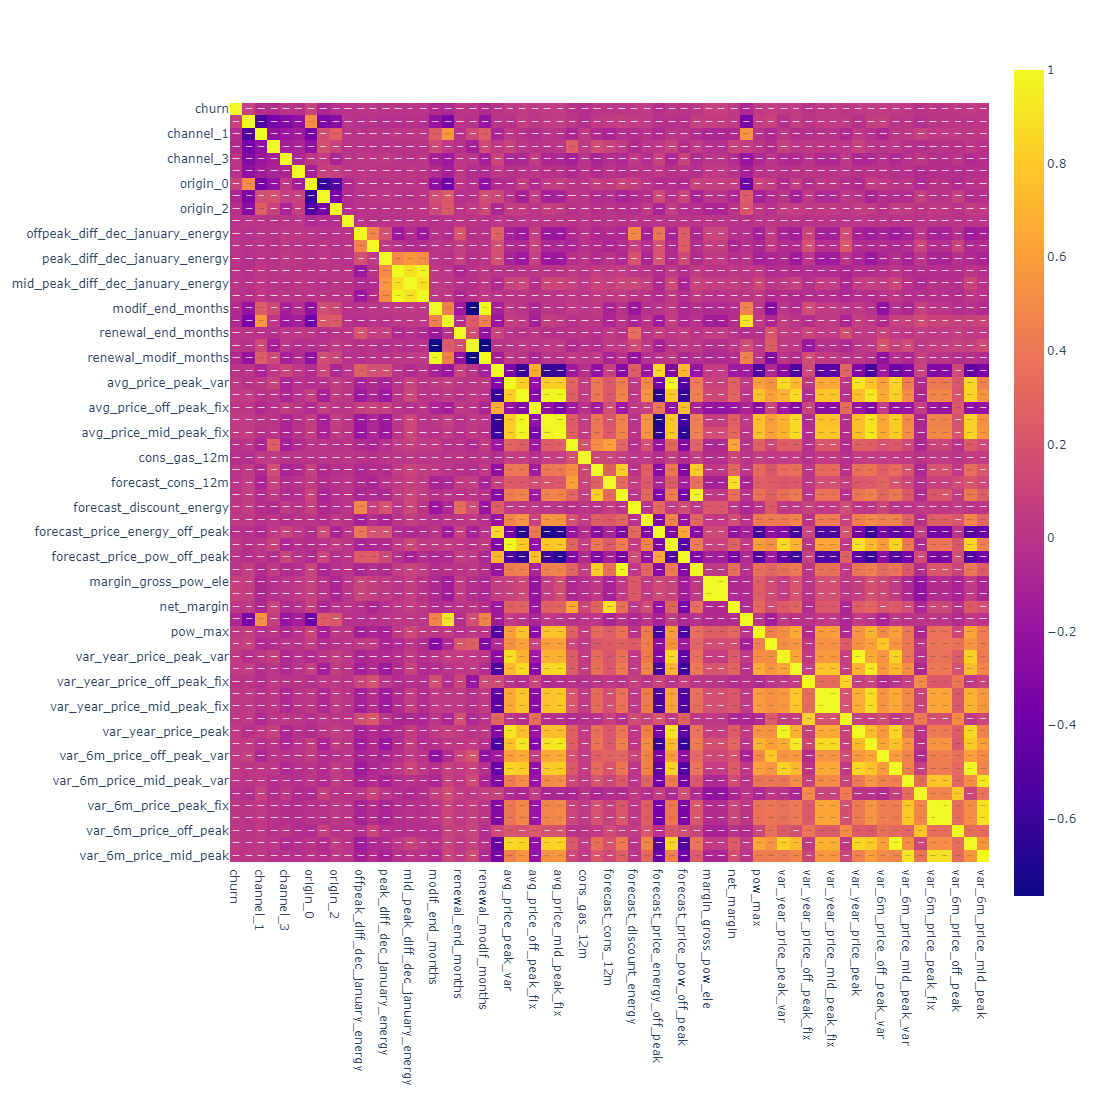

In [133]:
fig = px.imshow(df_nonskew.drop('id', axis = 1).corr(), text_auto = True, width = 1100, height = 1100)
fig.show()

Based on above correlations, we can see that some features have a nearly 1 correlation with each other. Thus, we would drop some columns based on that such as: <br>
 - num_years_antig
 - modif_end_months

In [135]:
df_nonskew.drop(columns = ['num_years_antig', 'modif_end_months'], inplace = True)